In [8]:
# Plik beauty.csv zawiera dane z pracy Hamermesha i Parker (2005) na temat oceny piękna instruktorów
# i jakości ich nauczania dla kilku kursów na University of Texas.
# Oceny dydaktyczne przeprowadzono pod koniec semestru, a oceny urody dokonano
# później przez sześciu studentów, którzy nie uczestniczyli w zajęciach i nie byli świadomi ocen kursu.

In [9]:
import os
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
os.getcwd()

'C:\\Users\\sszczesn\\Desktop\\priv\\aibd'

In [10]:
# Show data in *.csv file
data = pd.read_csv("C:/Users/sszczesn/Desktop/priv/aibd/Lab6/Zad2/beauty.csv")
print(data)

     tenured  profnumber  minority  age  beautyf2upper  beautyflowerdiv  \
0          0           1         1   36              6                5   
1          1           2         0   59              2                4   
2          1           3         0   51              5                5   
3          1           4         0   40              4                2   
4          0           5         0   31              9                7   
..       ...         ...       ...  ...            ...              ...   
458        0          93         0   32              9                6   
459        0          93         0   32              9                6   
460        0          94         1   42              7                3   
461        0          94         1   42              7                3   
462        0          94         1   42              7                3   

     beautyfupperdiv  beautym2upper  beautymlowerdiv  beautymupperdiv  ...  \
0                  7 

In [11]:
# Regression
X = data['btystdave']
Y = data['courseevaluation']
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
    
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:       courseevaluation   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     17.08
Date:                Mon, 09 Dec 2019   Prob (F-statistic):           4.25e-05
Time:                        17:20:22   Log-Likelihood:                -375.32
No. Observations:                 463   AIC:                             754.6
Df Residuals:                     461   BIC:                             762.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0100      0.026    157.205      0.0

In [13]:
# Variables taken from model above
const_coef = 4.0100
btystdave_coef = 0.1330

# btystdave - known, need to predict courseevaluation
btystdave = data['btystdave']

for row in data:
    predicted_courseevaluation = (const_coef) + (btystdave_coef)*btystdave
# Predicted data
print(predicted_courseevaluation)

0      4.036808
1      3.900131
2      3.922176
3      3.908080
4      4.199052
         ...   
458    4.162025
459    4.162025
460    4.054163
461    4.054163
462    4.054163
Name: btystdave, Length: 463, dtype: float64


In [14]:
# Original data
print(data['courseevaluation'])

0      4.3
1      4.5
2      3.7
3      4.3
4      4.4
      ... 
458    3.2
459    4.3
460    3.3
461    3.2
462    4.1
Name: courseevaluation, Length: 463, dtype: float64


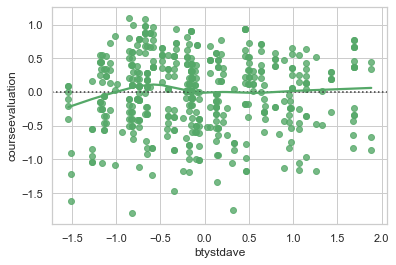

In [15]:
#Residua
sns.set(style="whitegrid")

# Plot the residuals after fitting a linear model
sns.residplot(data['btystdave'], data['courseevaluation'], lowess=True, color="g")
plt.show()

In [17]:
# Regression no. 2
X = data[['btystdave', 'btystdf2u', 'btystdfl', 'btystdfu', 'btystdm2u', 'btystdml', 'btystdmu']]
Y = data['courseevaluation']
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
    
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:       courseevaluation   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     3.929
Date:                Mon, 09 Dec 2019   Prob (F-statistic):           0.000355
Time:                        17:30:17   Log-Likelihood:                -370.16
No. Observations:                 463   AIC:                             756.3
Df Residuals:                     455   BIC:                             789.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0133      0.026    154.810      0.0

In [18]:
# Coefficients from model above
const_coef = 4.0133
btystdave_coef = -1.624e+04
btystdf2u_coef = 2707.3178
btystdfl_coef = 2707.2808
btystdfu_coef = 2707.3709
btystdm2u_coef = 2707.3324
btystdml_coef = 2707.2220
btystdmu_coef = 2707.3721

# btystdave - known, need to predict courseevaluation
btystdave = data[['btystdave', 'btystdf2u', 'btystdfl', 'btystdfu', 'btystdm2u', 'btystdml', 'btystdmu']]

for row in data:
    predicted_courseevaluation = (const_coef) + (btystdave_coef)*btystdave + (btystdf2u_coef)*btystdave + (btystdfl_coef)*btystdave +(btystdfu_coef)*btystdave + (btystdm2u_coef)*btystdave + (btystdml_coef)*btystdave + (btystdmu_coef)*btystdave
print(predicted_courseevaluation)

     btystdave  btystdf2u  btystdfl   btystdfu  btystdm2u   btystdml  \
0     4.798603   5.140615  5.797675   7.425471   6.669263   0.506647   
1     0.794887  -2.295711  3.726919   1.765283  -0.396598   0.506647   
2     1.440644   3.281534  5.797675  -2.008174  -0.396598   0.506647   
3     1.027746   1.422453 -0.414594   3.652012  -2.751886   2.795712   
4     9.551250  10.717860  9.939190  11.198930   6.669263  11.951973   
..         ...        ...       ...        ...        ...        ...   
458   8.466603  10.717860  7.868432   5.538741   4.313976  11.951973   
459   8.466603  10.717860  7.868432   5.538741   4.313976  11.951973   
460   5.306970   6.999696  1.656162   9.312199   1.958689   5.084777   
461   5.306970   6.999696  1.656162   9.312199   1.958689   5.084777   
462   5.306970   6.999696  1.656162   9.312199   1.958689   5.084777   

      btystdmu  
0     3.251951  
1     1.462781  
2     1.462781  
3     1.462781  
4     6.830291  
..         ...  
458  10.408631  

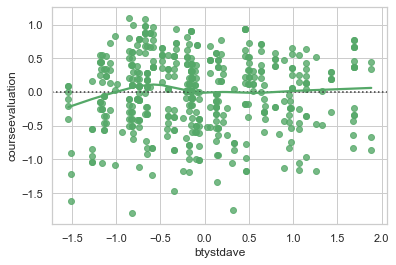

In [21]:
# Plot the residuals after fitting a linear model
sns.residplot(data['btystdave'], data['courseevaluation'], lowess=True, color="g")
plt.show()

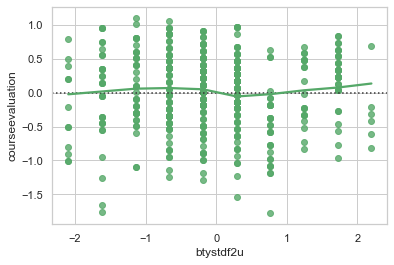

In [22]:
# Plot the residuals after fitting a linear model
sns.residplot(data['btystdf2u'], data['courseevaluation'], lowess=True, color="g")
plt.show()

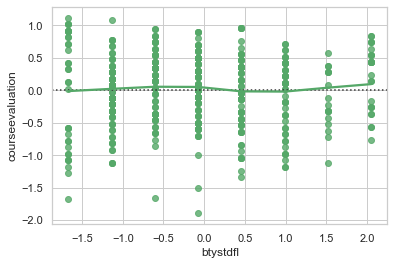

In [23]:
# Plot the residuals after fitting a linear model
sns.residplot(data['btystdfl'], data['courseevaluation'], lowess=True, color="g")
plt.show()

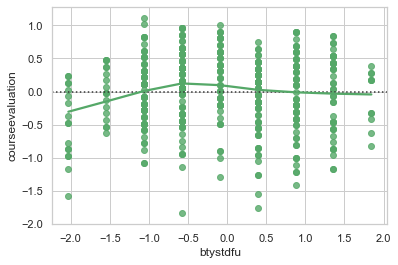

In [24]:
# Plot the residuals after fitting a linear model
sns.residplot(data['btystdfu'], data['courseevaluation'], lowess=True, color="g")
plt.show()

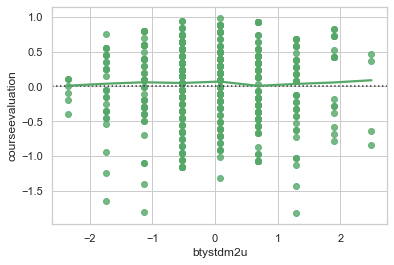

In [25]:
# Plot the residuals after fitting a linear model
sns.residplot(data['btystdm2u'], data['courseevaluation'], lowess=True, color="g")
plt.show()

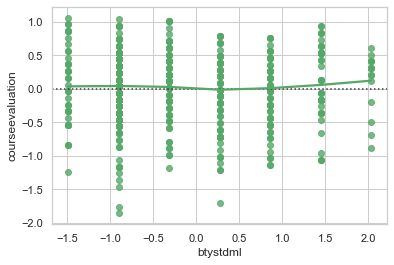

In [26]:
# Plot the residuals after fitting a linear model
sns.residplot(data['btystdml'], data['courseevaluation'], lowess=True, color="g")
plt.show()

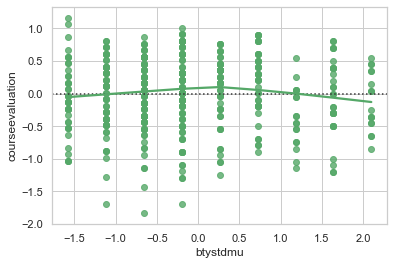

In [27]:
# Plot the residuals after fitting a linear model
sns.residplot(data['btystdmu'], data['courseevaluation'], lowess=True, color="g")
plt.show()

In [ ]:
# Summary
# Pretty good model, wyglada fajnie. Residua bardzo bliskie zera, co świadczy o dobrze dopasowanym modelu liniowym.